In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv('Pokemon.csv', index_col=0)

In [7]:
getwd()

NameError: name 'getwd' is not defined

In [8]:
directory

NameError: name 'directory' is not defined

In [7]:
#display first 5 obersvation
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [8]:
#summarize the dataset
df.describe()


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


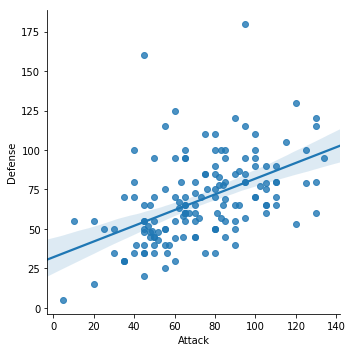

In [9]:
sns.lmplot(x='Attack', y='Defense', data=df)

(0, 141.9881096001028)

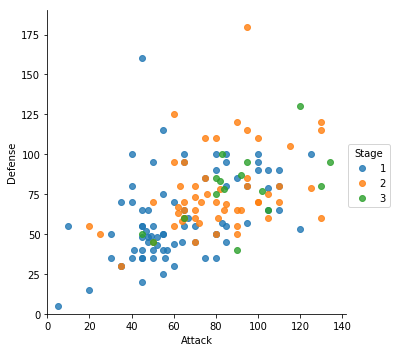

In [18]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
          fit_reg=False, #No regression line
          hue='Stage')   #Color by evolution stage
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

(0, 1.0)

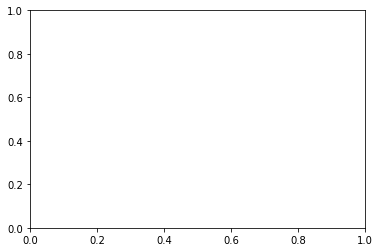

In [17]:
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

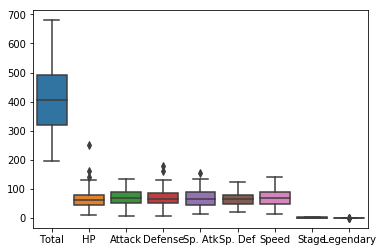

In [19]:
# Boxplot
sns.boxplot(data=df)

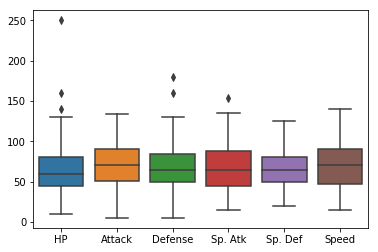

In [27]:
# pre-format DataFrame
stats_df = df.drop(['Total','Stage','Legendary'], axis=1)

# New boxplot using stats_df
sns.boxplot(data=stats_df)

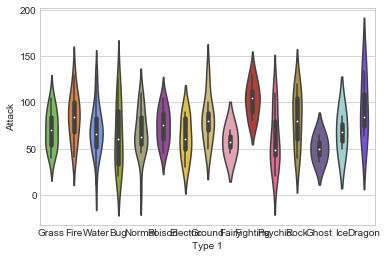

In [30]:
# set theme
sns.set_style('whitegrid')

# violin plot
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

In [29]:

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

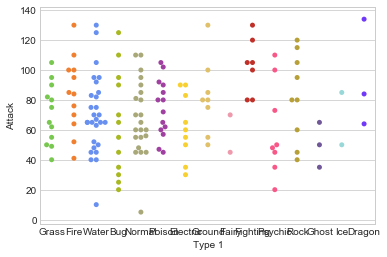

In [33]:
# swarm plot with pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

Text(0.5,1,u'Attack by Type')

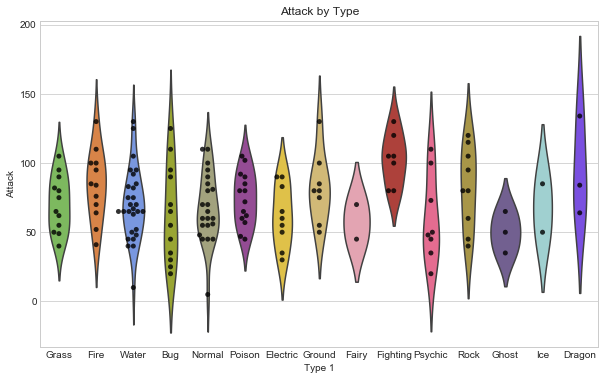

In [44]:
# set figure size with matplotlib
plt.figure(figsize=(10,6))

# create plot
sns.violinplot(x='Type 1', y='Attack', data=df, inner=None, #remove bars inside
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1', y='Attack', data=df, color='K', # make points black
             alpha=0.8) #slighly trasnparent

# set title with matplotlib
plt.title('Attack by Type')

In [45]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [46]:
# Melt DataFrame
melted_df = pd.melt(stats_df, id_vars=["Name","Type 1", "Type 2"], # Variable to keep 
                   var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [47]:
print(stats_df.shape)

(151, 9)


In [48]:
print(melted_df.shape)

(906, 5)


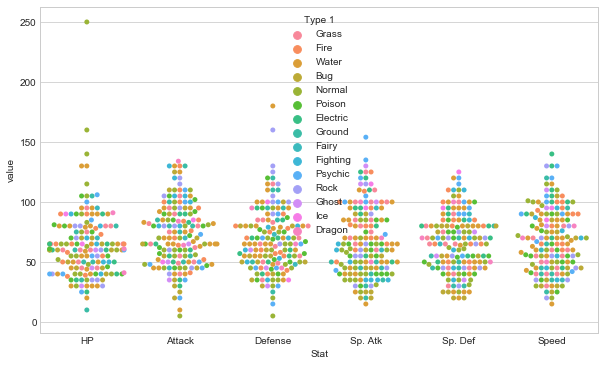

In [51]:
# Swarmplot with melted_df
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', y='value', data=melted_df,
             hue='Type 1')

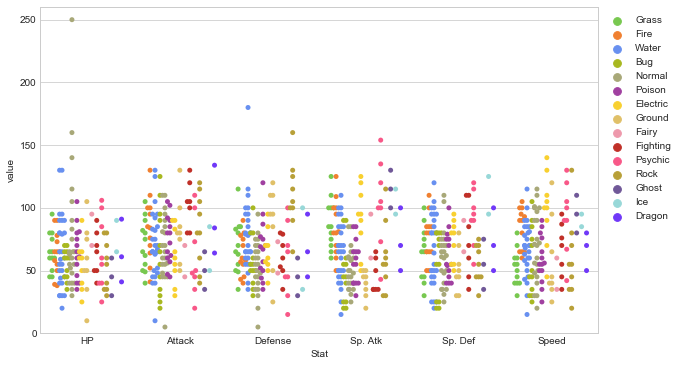

In [62]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
sns.swarmplot(x='Stat', y='value', data=melted_df,
              hue='Type 1', dodge=True, # 2.Seperate points by hue
              palette=pkmn_type_colors)
# 4. Adjust the y-axis
plt.ylim(0, 260)
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

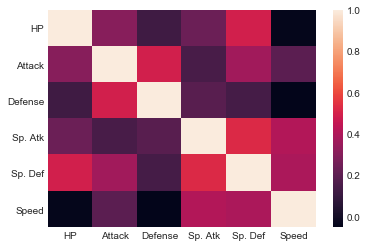

In [63]:
# Calculate correlation
corr = stats_df.corr()

# heatmap
sns.heatmap(corr)

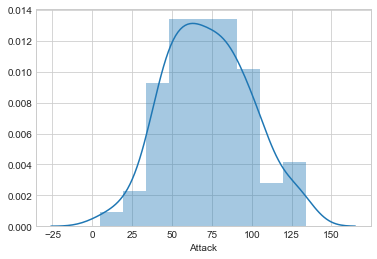

In [69]:
# distribution plot
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

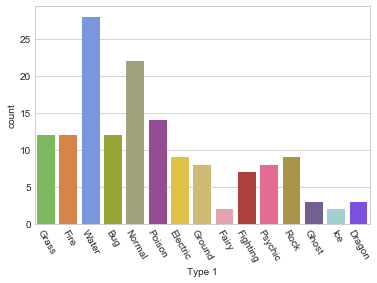

In [70]:
# count plot
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)

# Rotate x-labels
plt.xticks(rotation=-60)

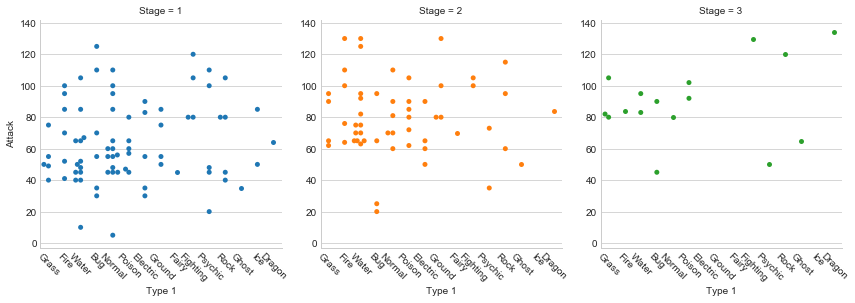

In [77]:
# Factor plot
g=sns.factorplot(x='Type 1', y='Attack', data=df,
              hue='Stage', # color by stage
              col='Stage', # separate by stage
              kind='swarm')# swarmplot
g.set_xticklabels(rotation=-45)

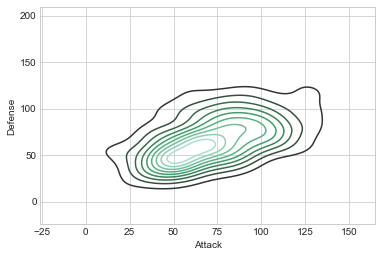

In [80]:
# density plot
sns.kdeplot(df.Attack, df.Defense)

In [1]:
# joint distribution plot
sns.jointplot(x='Attack', y='Defense', data=df)

NameError: name 'sns' is not defined